In [24]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import keras
import io
import imageio
from PIL import Image

In [48]:
(train_img,train_lable),(test_img,test_lable)=tf.keras.datasets.mnist.load_data()

In [49]:
print(train_img.shape)
print(train_lable.shape)
print(test_img.shape)
print(test_lable.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [50]:
train_img = train_img / 255
test_img = test_img / 255

# Sequantial Model

In [51]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# parameters initialization

In [52]:
keras.initializers.Zeros() # 全0
keras.initializers.Ones() # 全1
keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None) # 指定均值和方差的正态分布初始化
keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None) # 指定下边界和上边界的均匀分布初始化
keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None) # 截尾高斯分布初始化，位于均值两个标准差以外的数据将会被丢弃并重新生成，形成截尾分布

# custom callback

In [65]:
class VisCallback(tf.keras.callbacks.Callback):
    def __init__(self, inputs, ground_truth, display_freq=10, n_samples=10):
        self.inputs = inputs
        self.ground_truth = ground_truth
        self.images = []
        self.display_freq = display_freq
        self.n_samples = n_samples
        
    def on_epoch_end(self, epoch, logs=None):
        indexes = np.random.choice(len(self.inputs), size=self.n_samples)
        x_test, y_test = self.inputs[indexes], self.ground_truth[indexes]
        prediction = np.argmax(self.model.predict(x_test), axis=1)
        
        print(x_test.shape)
        self.images.append(np.array(x_test).reshape(28, 280).astype(np.uint8)*255)
        
    def on_train_end(self, logs=None):
        imageio.mimsave("./test.gif", self.images, fps=1)

# training

In [66]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])
history = model.fit(train_img,train_lable,epochs=1, callbacks=VisCallback(test_img, test_lable))

1867/1875 [============================>.] - ETA: 0s - loss: 0.0140 - acc: 0.9958WARNING:tensorflow:7 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000001C64CB9C1F0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
(10, 28, 28)
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0140 - acc: 0.9958


# test

In [8]:
model.evaluate(test_img,test_lable)

313/313 [==============================] - 0s 825us/step - loss: 0.0810 - acc: 0.9773


[0.08101972937583923, 0.9772999882698059]

# history plotting

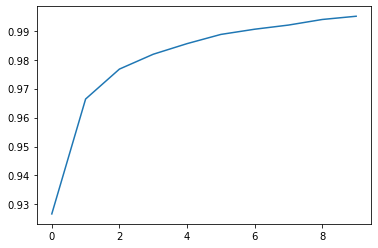

In [9]:
plt.plot(history.history['acc'])

# model save and load

In [37]:
model.save('./softmax_mnist_shortcut.h5')   #保存

In [33]:
new_model = keras.models.load_model('./softmax_mnist.h5')

# model visualization

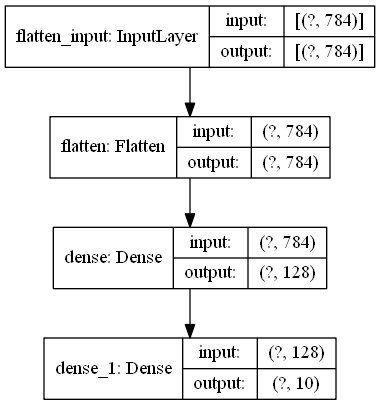

In [10]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)